In [86]:
import os
import csv

In [87]:
def addrPath(tweeter):
    path=addrRoot+str(tweeter)+'/可视化分析结果/'
    if os.path.exists(path) is False:
         os.makedirs(path)
    return path

In [88]:
def addrFile(tweeter,suffix):
    path=addrRoot+str(tweeter)+'/'
    if os.path.exists(path) is False:
         os.makedirs(path)
    address=path+tweeter+suffix+'.csv'
    return address  

In [89]:
import random

#for item in dataDict:
    #print(dataDict.get(item)[-1-sort[-1]])
    #print(item)
def randomText(no):
    
        item=random.choice(list(dataDict))
        return (item+':'+str(dataDict.get(item)[no]))

def exactText(no,item):
    text=(item+':'+str(dataDict.get(item)[no]))
    print(text)
    return text


In [90]:
#文件保存地址，改为你存放csv文件的完整地址
addrRoot='C:/Users/cascara/Desktop/seedcup/csv/blog/'

#是否调试
isDebug=False

#100万+显示
infinity=1000000

In [190]:
tweeter=input('输入博主姓名：')#'陈赫'

输入博主姓名： KobeBryant


In [191]:
#开始
startCollect=True


batch=0
dataDict={}
Title=[]
while(1):
    titleEixst=True
    address=addrFile(tweeter,'batch'+str(batch))    
    print(address)
    
    if os.path.exists(address) is True:
        fp = open(address,'r',newline='',encoding='utf-16')      
        reader=csv.reader(fp)
        for line in reader:
            if titleEixst is True:
                #将标题制成各个
                if startCollect is True:
                    for item in line:
                        #print(item[-1])
                        if isDebug is True:
                            print(item)

                            
                        dataDict[item]=[]
                    startCollect=False
                Title=line    
                if isDebug is True:
                    print(line)
                titleEixst=False
            else:
                for no in range(len(line)):               
                    if(Title[no].find('count')>=0):
                        if line[no].find('0万') > 0:
                            dataDict.get(Title[no]).append(infinity)
                        else:
                            dataDict.get(Title[no]).append(eval(line[no]))
                        
                        #dataDict.get(Title[no]).append((line[no]))
                        
                    else:
                        dataDict.get(Title[no]).append((line[no]))
                    if isDebug is True:
                        print(Title[no])
                        print(line[no])               
                
    
    else:
        print('不存在'+address)
        break
    fp.close()
    batch+=1
#print(dataDict)

C:/Users/cascara/Desktop/seedcup/csv/blog/KobeBryant/KobeBryantbatch0.csv
C:/Users/cascara/Desktop/seedcup/csv/blog/KobeBryant/KobeBryantbatch1.csv
C:/Users/cascara/Desktop/seedcup/csv/blog/KobeBryant/KobeBryantbatch2.csv
C:/Users/cascara/Desktop/seedcup/csv/blog/KobeBryant/KobeBryantbatch3.csv
C:/Users/cascara/Desktop/seedcup/csv/blog/KobeBryant/KobeBryantbatch4.csv
不存在C:/Users/cascara/Desktop/seedcup/csv/blog/KobeBryant/KobeBryantbatch4.csv


In [192]:
print(dataDict[Title[-1]])

['未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知', '未知']


### 读入数据

In [193]:
originData={}
retweetData={}

labels=[0 for i in range(4)]
cnLabels={}

labels[1]='reposts_count'
labels[2]='comments_count'
labels[3]='attitudes_count'
labels[0]='follow_count'

cnLabels[labels[1]]='转发量'
cnLabels[labels[2]]='评论量'
cnLabels[labels[3]]='点赞量'
cnLabels[labels[0]]='粉丝量'


for i in range(4):
    #print(choice+label)
    try:
        #originData[cnLabels[i]]=np.asarray(dataDict.get('原文'+labels[i])[::-1])
        retweetData[labels[i]]=np.asarray(dataDict.get('转发'+labels[i])[::-1])
    except:
        pass
    try:
        originData[labels[i]]=np.asarray(dataDict.get('原文'+labels[i])[::-1])
        #retweetData[cnLabels[i]]=np.asarray(dataDict.get('转发'+labels[i])[::-1])
    except:
        pass



In [194]:
test=np.asarray(range(3))
print(test)
test=np.delete(test,1)
print(test)

[0 1 2]
[0 2]


###  对比原文转发，评论，点赞量


reposts_count
原文reposts_count:267460
原文text:
comments_count
原文comments_count:104385
原文text:
attitudes_count
原文attitudes_count:535619
原文text:


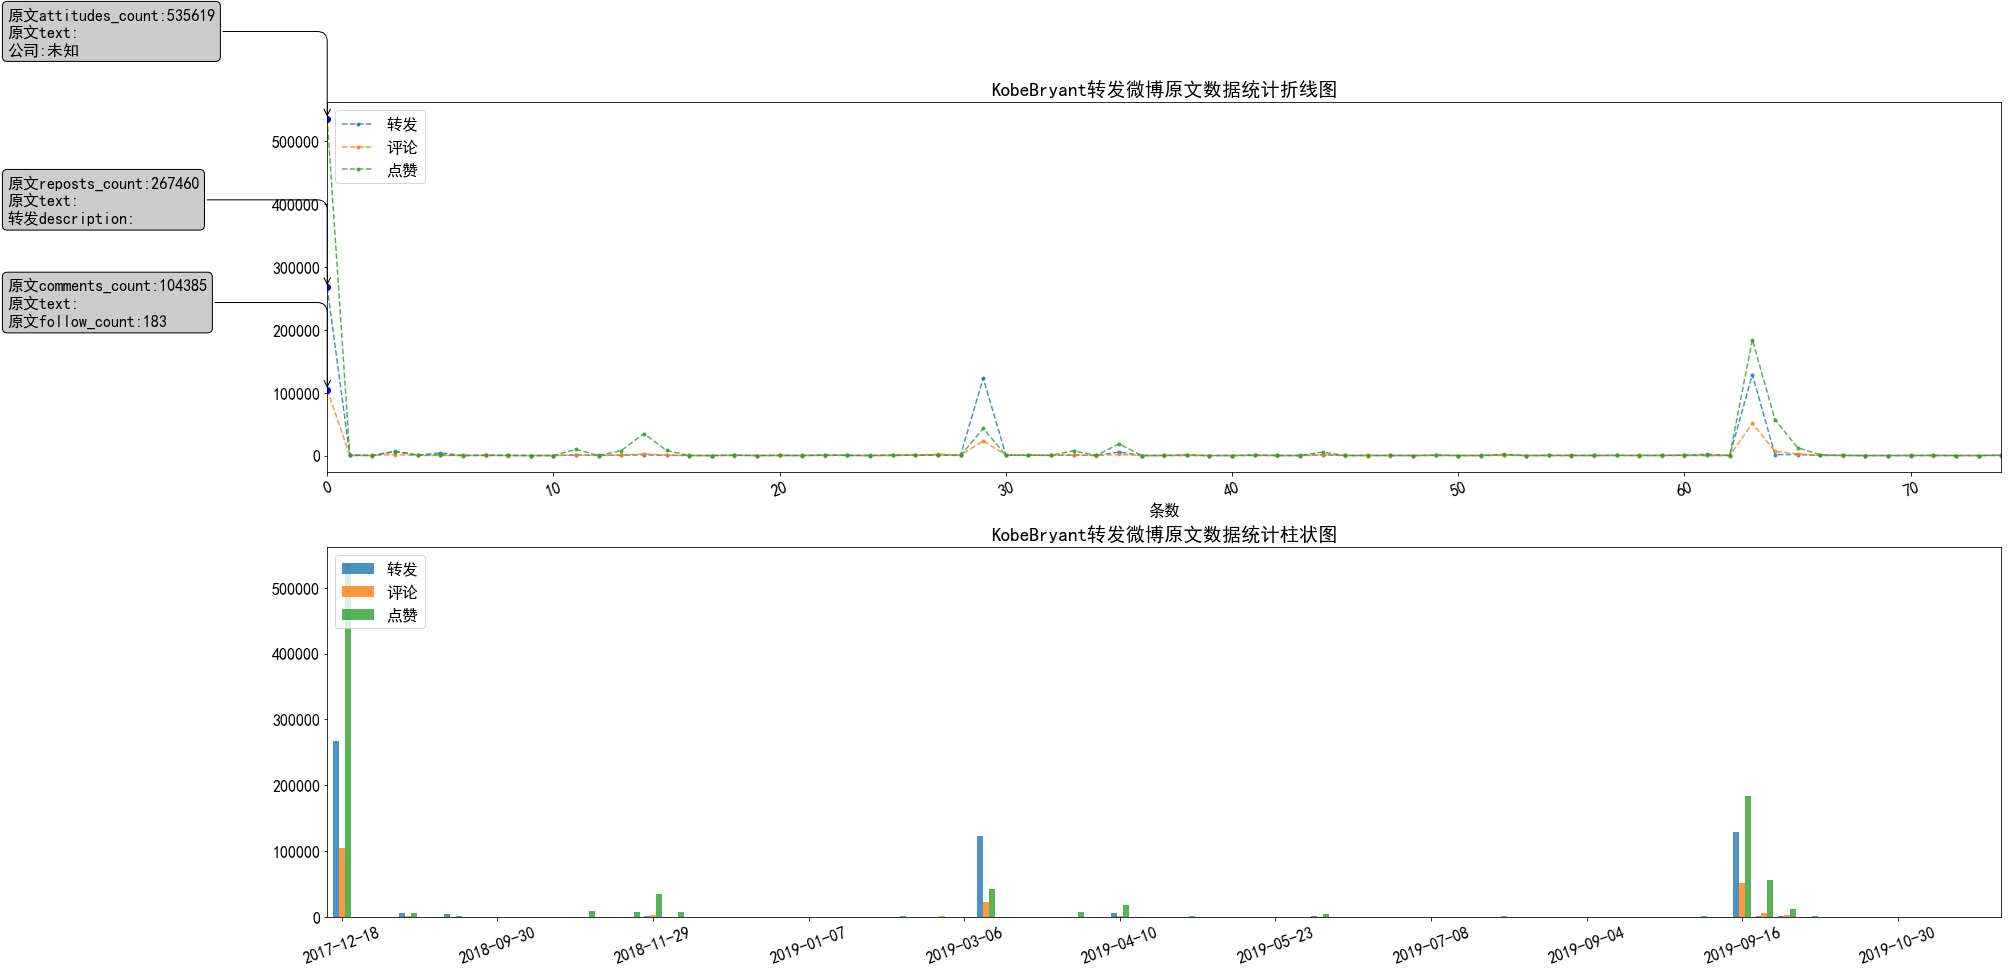

In [195]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
choice='原文'
width=30
height=15
font = {'family' : 'SimHei',
    'weight' : 'bold',
    'size'  : '16'}
    #fig3 = plt.figure(figsize=(10,6))
    #plt.subplots_adjust(hspace=0.3)
    # 创建子图及间隔设置

#ax = fig3.add_subplot(2,1,1)
plt.rc('font', **font) # pass in the font dict as kwargs
# 创建数据
repost=originData[labels[1]]
comment=originData[labels[2]]
attitude=originData[labels[3]]
time=dataDict.get('原文created_at')[::-1]

data = pd.DataFrame(np.transpose([repost,comment,attitude]),#np.random.rand(30,3),#*1000,
                   columns = ['转发','评论','点赞'],
                   index=range(len(repost))#index = pd.period_range('20170601','20170630')
                   )

fig=plt.figure(figsize=(width,height))

title=tweeter+'转发微博'+choice



ax1=fig.add_subplot(2,1,1)

data.plot(kind='line',
       style = '--.',
       alpha = 0.8,
              ax=ax1,
       #figsize = (40,15),
       title =title+'数据统计折线图',
          rot=20)
# 折线图比较
plt.xlabel('条数')
plt.legend(loc=2)
degree=0
for label in labels[1:]:
    print(label)
    
    if(choice == '原文'):
        sort=originData[label].argsort()
        max=originData[label].max()
    else:
        sort=retweetData[label].argsort()
        max=retweetData[label].max()
    no=-1-sort[-1]
    plt.plot(sort[-1],max,'ob')
   
    # 设置注释文本的样式和箭头的样式
    bbox = dict(boxstyle="round", fc="0.8")

    arrowprops = dict(
        arrowstyle = "->",
        connectionstyle = "angle,angleA=0,angleB=90,rad=10")

    # 设置偏移量
    offset = 64    

    # xycoords默认为'data'数据轴坐标，对坐标点（5,0）添加注释

    # 注释文本参考被注释点设置偏移量，向左2*72points，向上72points

    ax1.annotate(exactText(no,choice+label)+'\n'+exactText(no,'原文text')+'\n'+randomText(no),

                (sort[-1],max),xytext=(-offset*5, offset),  textcoords='offset points',

                bbox=bbox, arrowprops=arrowprops)

    #degree+=1


#plt.plot(sort[-1],retweetData[labels[3]].max(),'ob')

### 多系列柱状图比较
ax2=fig.add_subplot(2,1,2)

#plt.savefig(title+'数据统计折线图'+'.pdf')
 
data.plot(kind = 'bar',
          width = 0.8,
          alpha = 0.8,
              ax=ax2,
          #figsize = (40,15),
          title =title+'数据统计柱状图',
          
          rot=20)

###  添加日期标签
plt.xticks(range(len(repost))[::len(repost)//10]   )            #个数 这里是三个是一个间隔  共10个  和下面的一样
plt.legend(loc=2)
ax2.set_xticklabels(time[::len(repost)//10]) 
#ax2.axis('off')
plt.savefig(addrPath(tweeter)+title+'数据统计图'+'.pdf')
plt.show()

###  对比原文转发，评论，点赞量

reposts_count
转发reposts_count:15999
转发text:Thank you and all of your fans' support
0
comments_count
转发comments_count:5251
转发text:Thank you and all of your fans' support
0
attitudes_count
转发attitudes_count:30470
转发text:Thank you and all of your fans' support
0


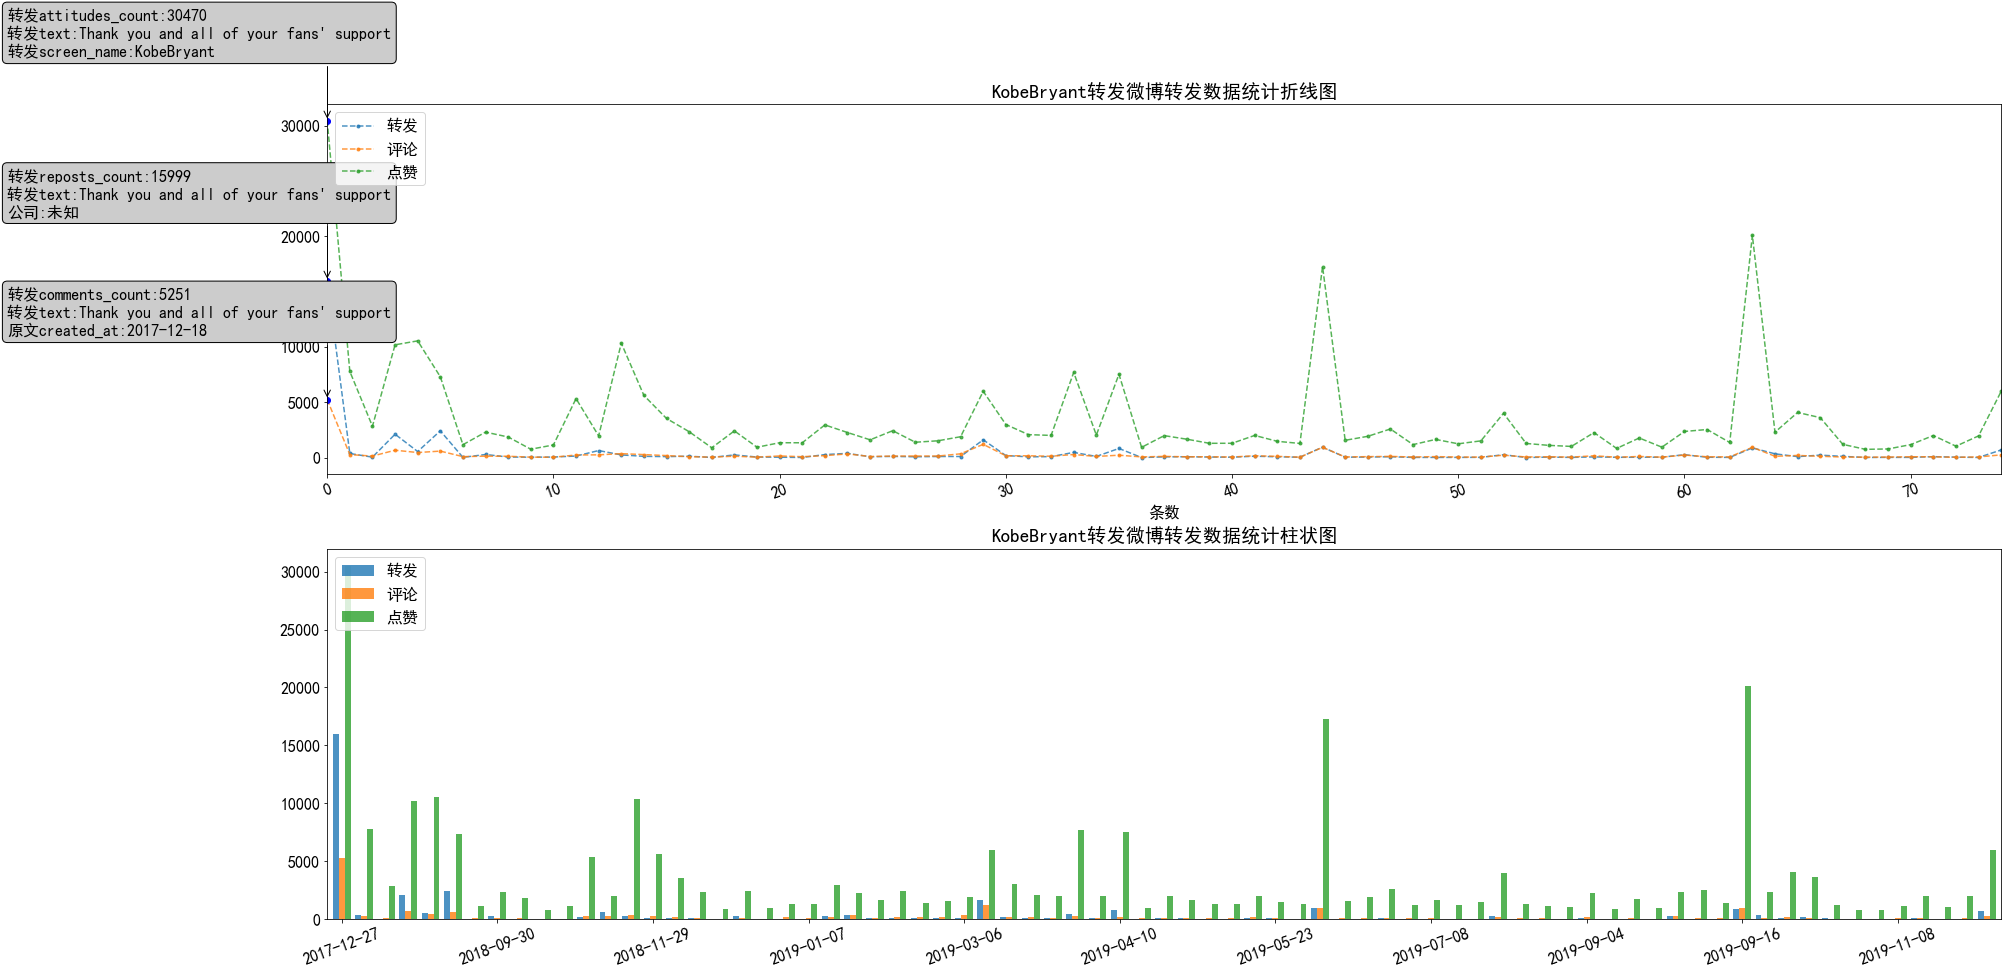

In [196]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt





choice='转发'
width=30
height=15

# 创建数据
repost=retweetData[labels[1]]
comment=retweetData[labels[2]]
attitude=retweetData[labels[3]]
time=dataDict.get(choice+'created_at')[::-1]

data = pd.DataFrame(np.transpose([repost,comment,attitude]),#np.random.rand(30,3),#*1000,
                   columns = ['转发','评论','点赞'],
                   index=range(len(repost))#index = pd.period_range('20170601','20170630')
                   )

fig=plt.figure(figsize=(width,height))

title=tweeter+'转发微博'+choice



ax1=fig.add_subplot(2,1,1)

data.plot(kind='line',
       style = '--.',
       alpha = 0.8,
              ax=ax1,
       #figsize = (40,15),
       title =title+'数据统计折线图',
          rot=20)
# 折线图比较
plt.xlabel('条数')
plt.legend(loc=2)
degree=0
for label in labels[1:]:
    print(label)
    
    if(choice == '原文'):
        sort=originData[label].argsort()
        max=originData[label].max()
    else:
        sort=retweetData[label].argsort()
        max=retweetData[label].max()
    no=-1-sort[-1]
    plt.plot(sort[-1],max,'ob')
   
    # 设置注释文本的样式和箭头的样式
    bbox = dict(boxstyle="round", fc="0.8")

    arrowprops = dict(
        arrowstyle = "->",
        connectionstyle = "angle,angleA=0,angleB=90,rad=10")

    # 设置偏移量
    offset = 64    

    # xycoords默认为'data'数据轴坐标，对坐标点（5,0）添加注释

    # 注释文本参考被注释点设置偏移量，向左2*72points，向上72points

    ax1.annotate(exactText(no,choice+label)+'\n'+exactText(no,choice+'text')+'\n'+randomText(no),

                (sort[-1],max),xytext=(-offset*5, offset),  textcoords='offset points',

                bbox=bbox, arrowprops=arrowprops)

    #degree+=1
    
    print(sort[-1])


#plt.plot(sort[-1],retweetData[labels[3]].max(),'ob')

### 多系列柱状图比较
ax2=fig.add_subplot(2,1,2)

#plt.savefig(title+'数据统计折线图'+'.pdf')
 
data.plot(kind = 'bar',
          width = 0.8,
          alpha = 0.8,
              ax=ax2,
          #figsize = (40,15),
          title =title+'数据统计柱状图',
          
          rot=20)

###  添加日期标签
plt.xticks(range(len(repost))[::len(repost)//10]   )            #个数 这里是三个是一个间隔  共10个  和下面的一样
plt.legend(loc=2)
ax2.set_xticklabels(time[::len(repost)//10]) 
#ax2.axis('off')
plt.savefig(addrPath(tweeter)+title+'数据统计图'+'.pdf')
plt.show()

### 表现转发量的占比变化趋势与粉丝量相比较

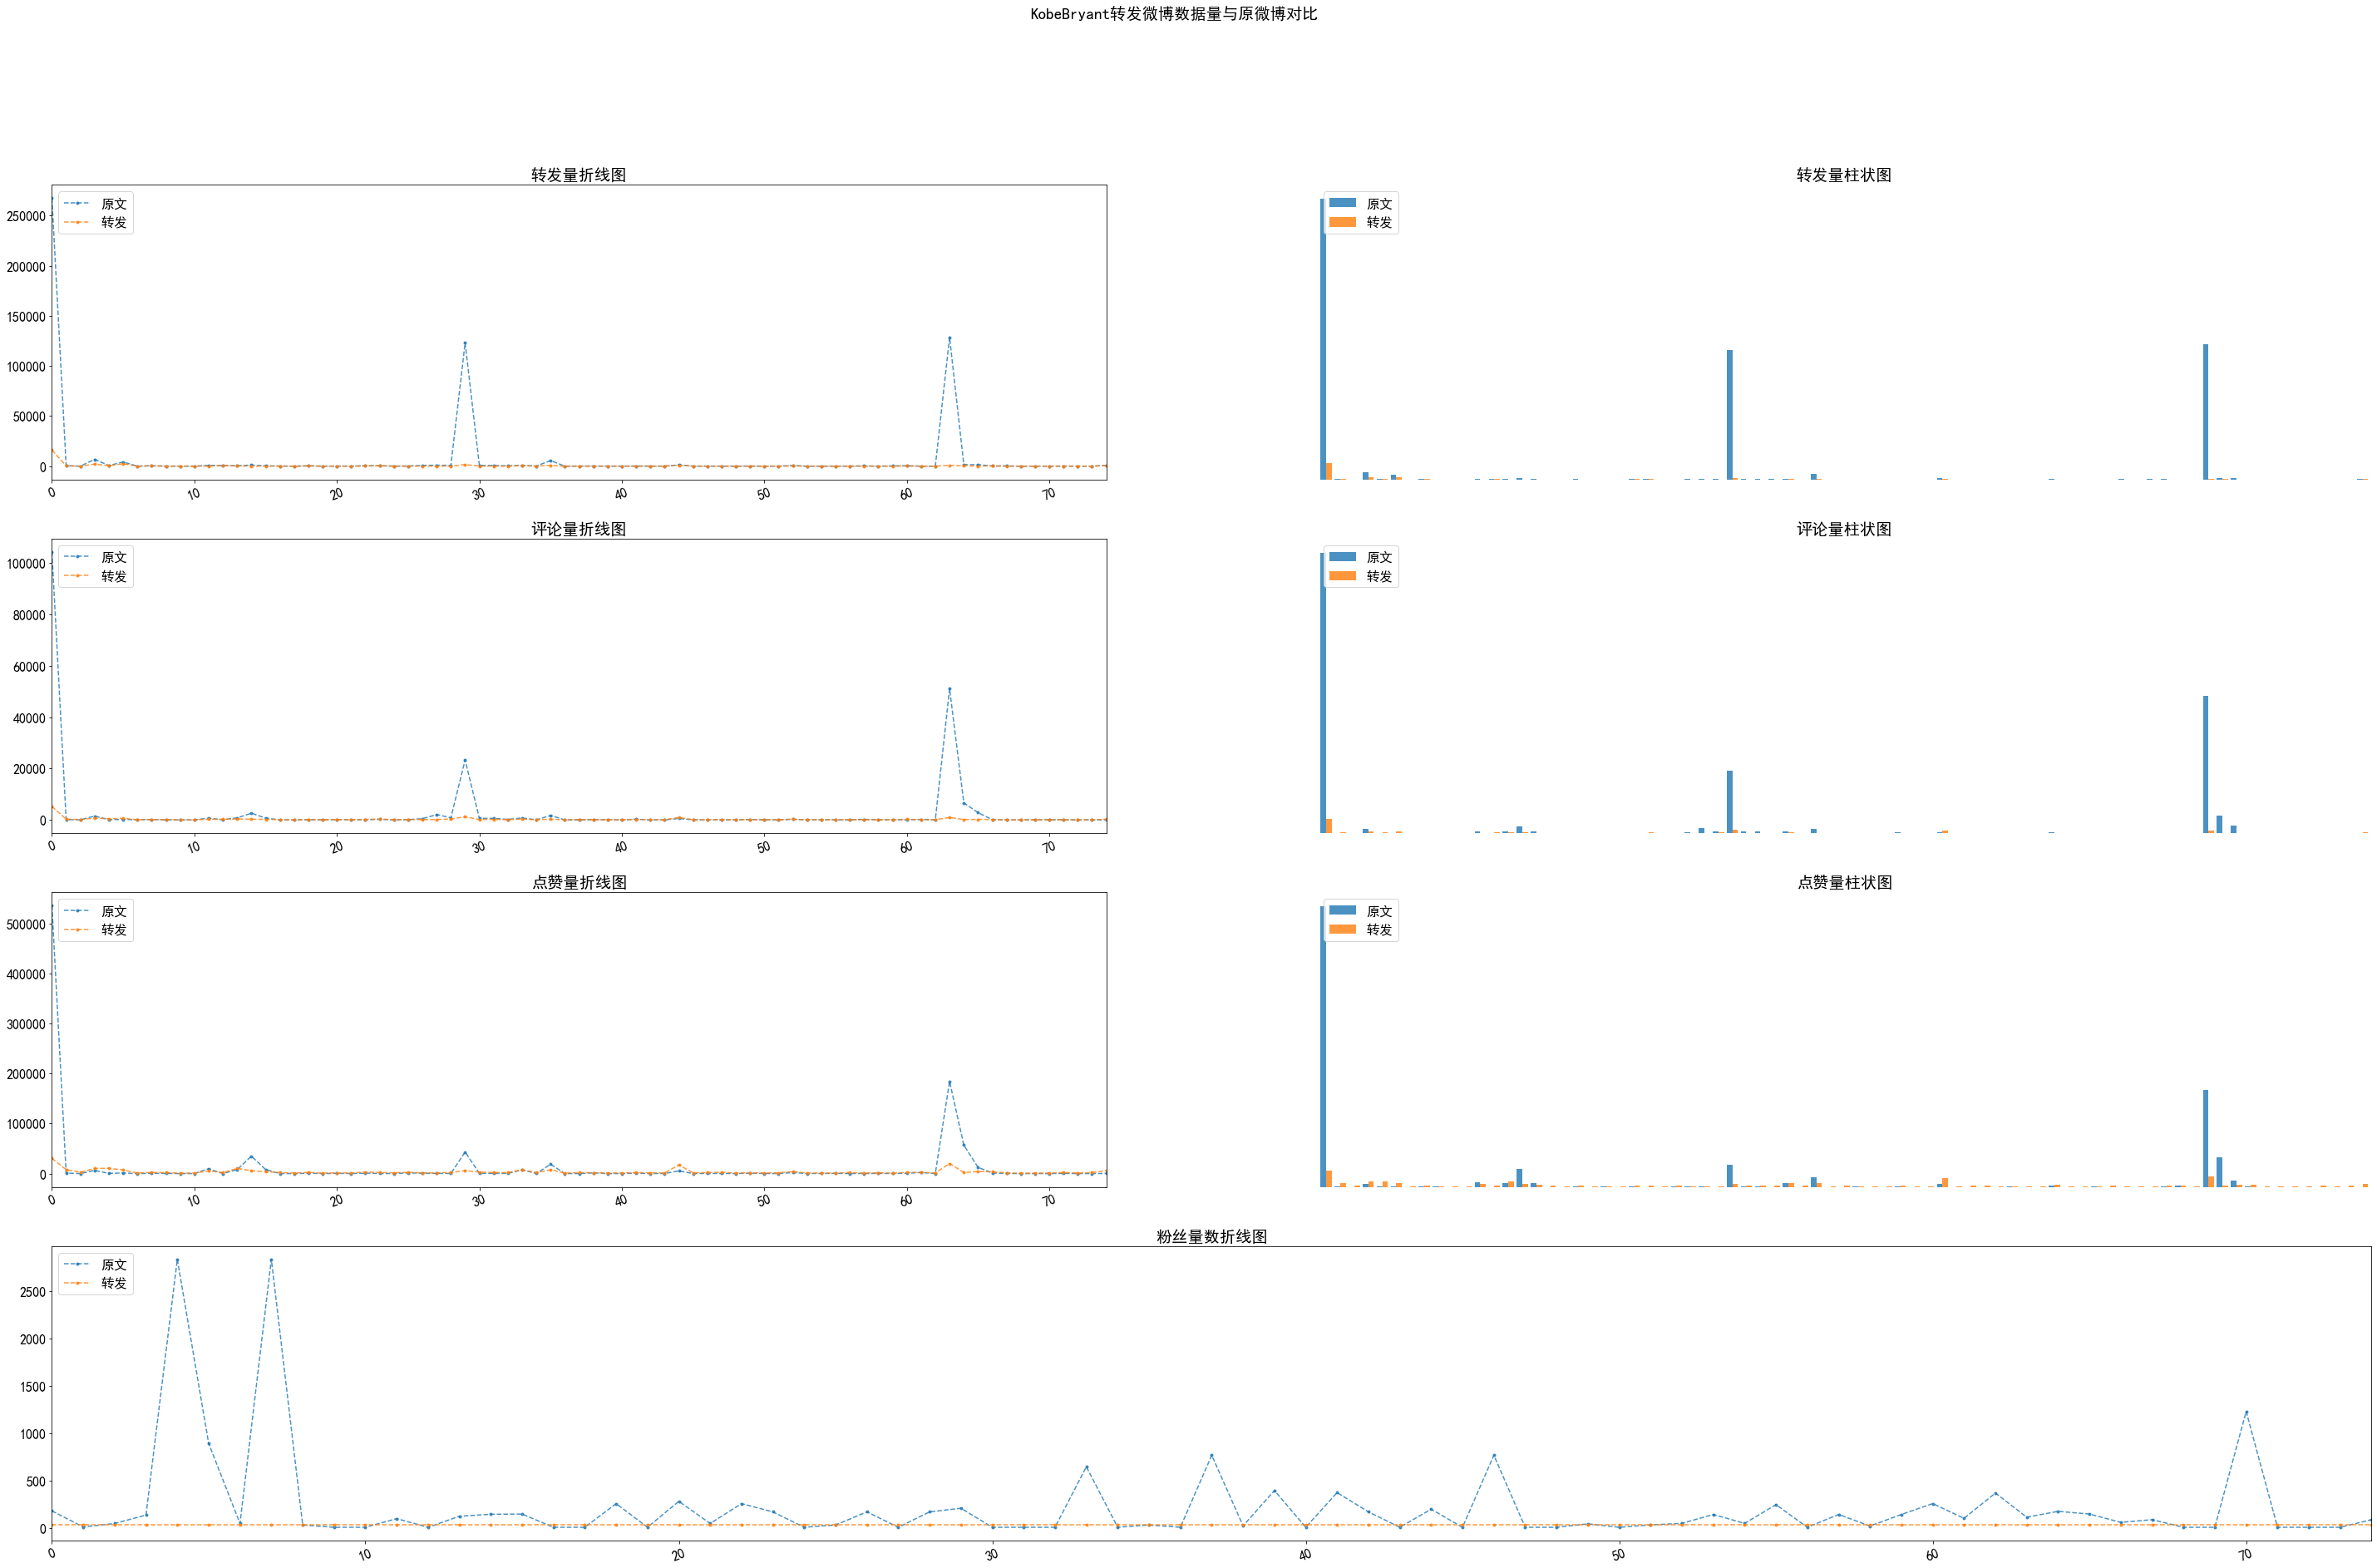

In [197]:
title=tweeter+'转发微博数据量与原微博对比'
width=50
height=30

# 创建数据 → 30天内A/B产品的日销售额
fig=plt.figure(figsize=(width,height))#60,52
fig.suptitle(title)

for i in range(1,4):
    
    data = pd.DataFrame(np.transpose([originData[labels[i]],retweetData[labels[i]]]),#np.random.rand(30,3),#*1000,
                   columns = ['原文','转发'],
                   index=range(len(originData[labels[i]]))
                       )#index = pd.period_range('20170601','20170630')
                    
    ax1 = fig.add_subplot(4,2,2*i-1)               
    data.plot(
        kind='line',
           style = '--.',
           alpha = 0.8,
           #figsize = (40,35),
            ax=ax1,
           title =cnLabels[labels[i]]+'折线图',
              rot=20)
    
    plt.legend(loc=2)
    # 折线图比较

    ax2 = fig.add_subplot(4,2,2*i)

    ax2=data.plot(kind = 'bar',
              width = 0.8,
              alpha = 0.8,
              ax=ax2,
              #figsize = (40,35),
              title =cnLabels[labels[i]]+'柱状图',
              rot=20)
    ax2.axis('off')
    plt.legend(loc=2)
    # 多系列柱状图比较
    
#粉丝量图像
#fig = plt.figure(figsize=(10,10))
#fig.suptitle(title)

data = pd.DataFrame(np.transpose([originData[labels[0]],retweetData[labels[0]]]),
                   columns = ['原文','转发'],
                   index=range(len(originData[labels[i]]))
                       )
ax1 = plt.subplot(4,1,4)               
data.plot(
        kind='line',
           style = '--.',
           alpha = 0.8,
           #figsize = (40,35),
              ax=ax1,
           title =cnLabels[labels[0]]+'数折线图',
              rot=20)

plt.legend(loc=2)
plt.savefig(addrPath(tweeter)+title+'.pdf')
plt.show()



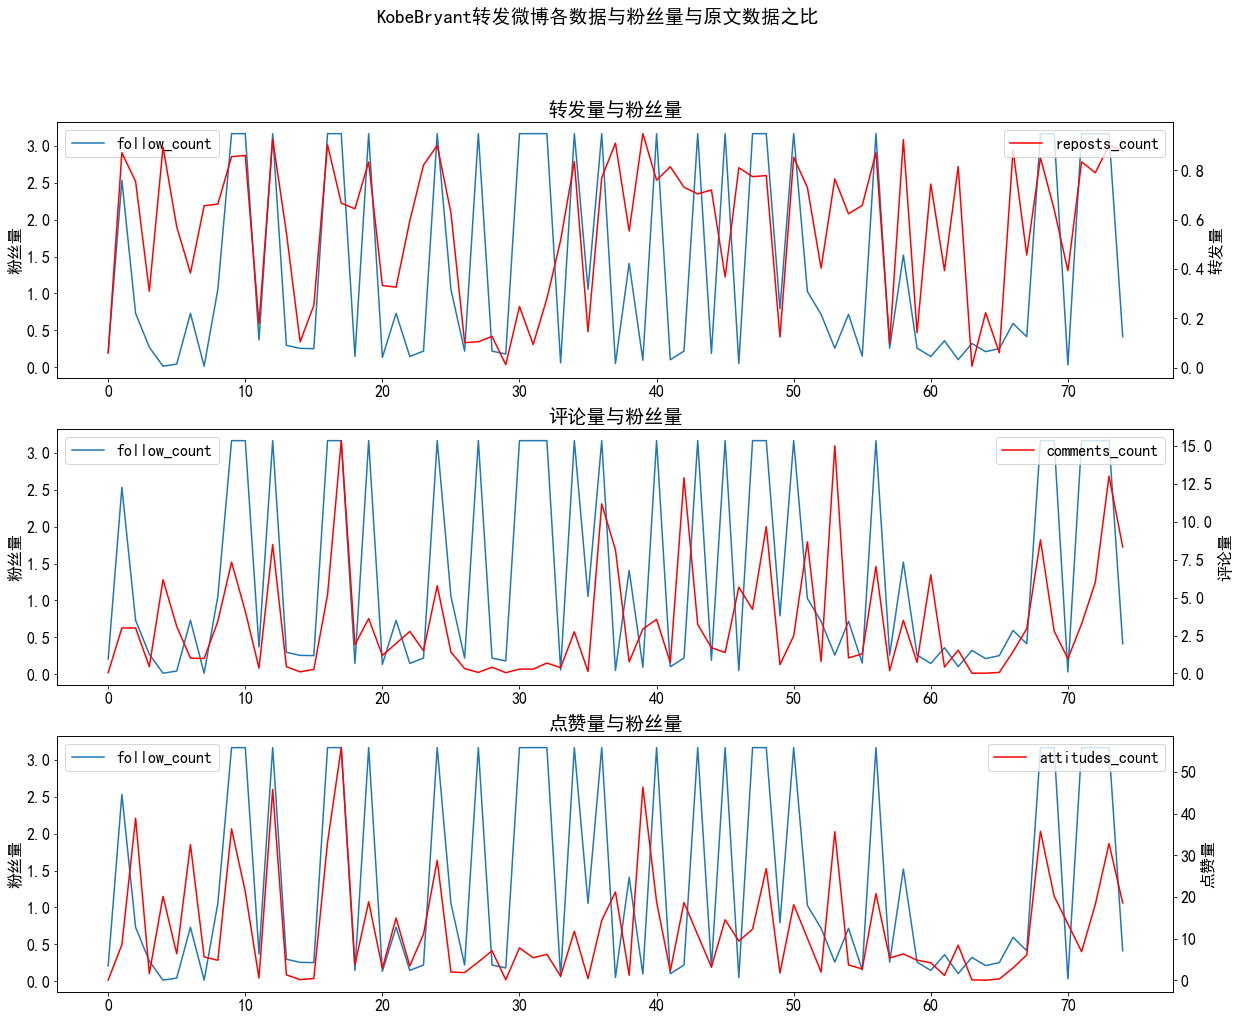

In [198]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

z=[0 for i in range(4)]


for i in range(len(z)): 
    retweet=retweetData.get(labels[i])
    origin=originData.get(labels[i])
    z[i]=np.asarray(retweet)/(np.asarray(origin)+1)


#y = np.asarray(retweetFans)/(np.asarray(originFans)+1)

x = range(len(z[0]))


title=tweeter+r'转发微博各数据与粉丝量与原文数据之比'
fig = plt.figure(figsize=(20,16))


fig.suptitle(title)

for i in range(1,4):
    ax = fig.add_subplot(3,1,i)
    ax.plot(x,z[0], '-', label = labels[0])
    ax.set_ylabel(cnLabels[labels[0]])
    
    ax2 = ax.twinx()    
    ax2.plot(x,z[i],'r' ,label = labels[i])    
    
    ax2.set_ylabel((cnLabels[labels[i]]))
    ax.legend(loc=2)
    ax2.legend(loc=1)
    
    plt.title(cnLabels[labels[i]]+'与粉丝量')
plt.savefig(addrPath(tweeter)+title+'.pdf')
plt.show()
